In [69]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

In [70]:
# Define the stock ticker
ticker = "RELIANCE.NS"

# Fetch the data using yfinance
df = yf.download(ticker, start=datetime(2005, 1, 1), end=datetime(2024, 1, 1), progress=False)

# Remove existing headers by setting columns to an empty list
df.columns = [None] * len(df.columns)  # Clear the existing column names

# Add your custom headers
custom_headers = ['Adjusted Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.columns = custom_headers  # Set the new column names
df.head()

,Adjusted Close,Close,High,Low,Open,Volume
Date,,,,,,
2005-01-03 00:00:00+00:00,29.396076,38.834202,38.916321,38.116570,38.516445,96188867
2005-01-04 00:00:00+00:00,28.715027,37.934486,39.273350,37.816666,39.273350,73639782
2005-01-05 00:00:00+00:00,28.644754,37.841656,38.091579,36.856255,37.559605,112450407
2005-01-06 00:00:00+00:00,28.442064,37.573887,38.309368,37.291828,37.702415,91978134
2005-01-07 00:00:00+00:00,29.309587,38.719952,39.109116,37.670284,38.202259,108134977


In [71]:
# Reset the index of the DataFrame to make 'index' a regular column, allowing for clean manipulation.
df = df.reset_index()
# Drop the 'Date' and 'Adjusted Close' columns as they are not needed for further analysis.
df = df.drop(['Date', 'Adjusted Close'], axis=1)
# Display the first few rows of the updated DataFrame for verification.
df.head()

,Close,High,Low,Open,Volume
0,38.834202,38.916321,38.116570,38.516445,96188867
1,37.934486,39.273350,37.816666,39.273350,73639782
2,37.841656,38.091579,36.856255,37.559605,112450407
3,37.573887,38.309368,37.291828,37.702415,91978134
4,38.719952,39.109116,37.670284,38.202259,108134977


In [72]:
rows, cols = df.shape
print(f"Rows: {rows}, Coolumns: {cols}")

Rows: 4688, Coolumns: 5


### **Moving Average For 100**

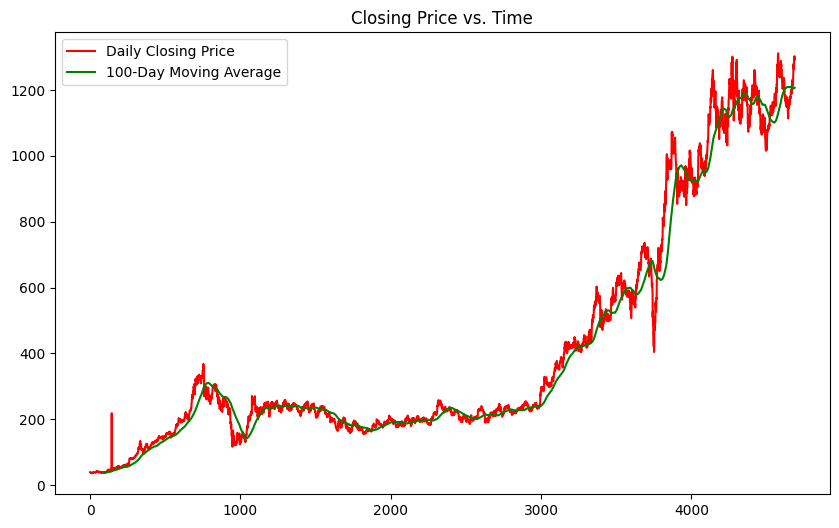

In [73]:
# Calculate the 100-day moving average for the 'Close' prices
moving_average_100 = df['Close'].rolling(window=100).mean()
# Set up the plot area with a specific size for better visualization
plt.figure(figsize=(10, 6))
# Add a title to the plot for context
plt.title("Closing Price vs. Time")
# Plot the daily closing prices in red, labeling them as 'Daily Closing Price'
plt.plot(df['Close'], color='red', label="Daily Closing Price")
# Plot the 100-day moving average in green, labeling it as '100-Day Moving Average'
plt.plot(moving_average_100, color='green', label="100-Day Moving Average")
# Display the legend to distinguish between the two plots
plt.legend()
# Show the plot
plt.show()

### **Moving Average For 200**

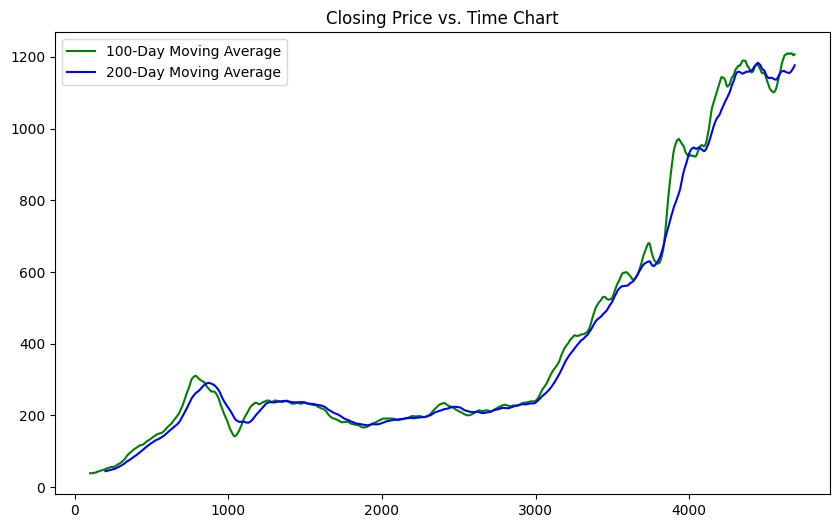

In [74]:
# Calculate the 200-day moving average for the 'Close' prices
moving_average_200 = df['Close'].rolling(window=200).mean()
# Set up the plot area with a specific size for better visualization
plt.figure(figsize=(10, 6))
# Add a title to the plot for context
plt.title("Closing Price vs. Time Chart")
# Plot the 100-day moving average in green, labeling it as '100-Day Moving Average'
plt.plot(moving_average_100, color='green', label="100-Day Moving Average")
# Plot the 200-day moving average in blue, labeling it as '200-Day Moving Average'
plt.plot(moving_average_200, color='blue', label="200-Day Moving Average")
# Display the legend to distinguish between the two moving averages
plt.legend()
# Show the plot
plt.show()

In [75]:
# Split the data into training and testing sets
# Using 80% of the data for training and the remaining 20% for testing
train_df = pd.DataFrame(df['Close'][:int(len(df) * 0.80)])
test_df = pd.DataFrame(df['Close'][int(len(df) * 0.80):])

# Display the number of rows and columns in each dataset
print(f"Training Set - Rows: {train_df.shape[0]}, Columns: {train_df.shape[1]}")
print(f"Testing Set - Rows: {test_df.shape[0]}, Columns: {test_df.shape[1]}")

Training Set - Rows: 3750, Columns: 1
Testing Set - Rows: 938, Columns: 1


In [76]:
# Initialize a MinMaxScaler to normalize the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
# Apply the scaler to the training dataset and transform it into a scaled array
train_scaled_array = scaler.fit_transform(train_df)
# Display the scaled training data
train_scaled_array

array([[0.00430865],
       [0.00302371],
       [0.00289113],
       ...,
       [0.61200801],
       [0.60698061],
       [0.58119065]])

In [77]:
# Initialize empty lists to hold training feature and label sets
x_train = []
y_train = []

# Loop through the training data, starting from index 100 to the end of the dataset
# This creates training sequences of 100 time steps each
for i in range(100, train_scaled_array.shape[0]):
    # Append the sequence of the previous 100 values to x_train
    x_train.append(train_scaled_array[i-100:i])

    # Append the target value (the next value after the 100-sequence) to y_train
    y_train.append(train_scaled_array[i, 0])

# Convert x_train and y_train lists to numpy arrays for compatibility with model input
x_train = np.array(x_train)
y_train = np.array(y_train)
# Display the shapes of the training feature and label arrays for verification
x_train.shape, y_train.shape

((3650, 100, 1), (3650,))

1. **Dropout**: A regularization technique where randomly selected neurons are ignored (or "dropped") during training. This helps prevent overfitting by ensuring that the model doesn't rely too heavily on specific neurons.

2. **LSTM (Long Short-Term Memory)**: A type of recurrent neural network (RNN) designed to learn long-term dependencies, which addresses the problem of "vanishing gradients" often encountered in simple RNNs.

3. **RNN (Recurrent Neural Network)**: A type of neural network suited for handling sequential or time-series data, where each layer's output depends not only on the current input but also on the previous outputs.

4. **Dense Layer**: A fully connected layer typically used in the final stages of a neural network. This layer adjusts the dimensionality of the output from previous layers and combines features for the final prediction.


In [78]:
# Initialize the Sequential model to build a stack of layers
model = Sequential()

# Add an Input layer to define the input shape
model.add(Input(shape=(x_train.shape[1], 1)))  # Input shape is defined here

# Add the first LSTM layer with 50 units (neurons).
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))  # Add a Dropout layer with a rate of 0.2 to prevent overfitting

# Add the second LSTM layer with 60 units, returning sequences for the next layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))  # Dropout rate of 0.3

# Add the third LSTM layer with 80 units, again returning sequences
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))  # Dropout rate of 0.4

# Add the fourth LSTM layer with 120 units; this time it does not return sequences,
# which is suitable for the final output processing
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))  # Dropout rate of 0.5

# Add a Dense layer with a single unit to produce the final output
# This layer will give the model's prediction for the next time step
model.add(Dense(units=1))

In [79]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 46s 335ms/step - loss: 0.0352
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 37s 304ms/step - loss: 0.0050
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 301ms/step - loss: 0.0040
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 437ms/step - loss: 0.0035
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 37s 319ms/step - loss: 0.0041
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 302ms/step - loss: 0.0032
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 313ms/step - loss: 0.0024
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 43s 333ms/step - loss: 0.0027
Epoch 9/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 38s 311ms/step - loss: 0.0023
Epoch 10/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - loss: 0.0024
Epoch 11/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 37s 318ms/step - loss: 0.0022
Epoch 12/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 337ms/step - loss: 0.0022
Epoch 13/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 37s 305ms/step - loss: 0.0023
Epoch 14/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 305ms/step - loss: 0.0019
Epoch 15/50
115

In [83]:
model.save('keras_model_trained_yf_stock.keras')

In [85]:
past_100_days = train_df.tail(100)
final_df = past_100_days._append(test_df, ignore_index=True)
final_df.head()

,Close
0,654.296509
1,655.690857
2,670.685913
3,676.194763
4,669.451538


In [86]:
input_data = scaler.fit_transform(final_df)
print(input_data)

[[0.27567873]
 [0.27721545]
 [0.29374156]
 ...
 [0.98006486]
 [0.99036951]
 [0.97901778]]


In [88]:
print(f"Input Data- Rows: {input_data.shape[0]} Cols: {input_data.shape[1]}")

Input Data- Rows: 1038 Cols: 1


In [89]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((938, 100, 1), (938,))

In [91]:
y_pred = model.predict(x_test)
print(f"Prediction- Rows: {y_pred.shape[0]}, Cols: {y_pred.shape[1]}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step
Prediction- Rows: 938, Cols: 1


In [92]:
# Retrieve the scale factors used by the scaler
# This contains the scaling factor for each feature
scale = scaler.scale_

# Calculate the inverse scale factor
# This is used to convert the scaled predictions back to their original values
scale_factor = 1 / scale

# Scale the predicted values back to their original range
# This assumes y_pred is scaled using the same scaler as the training data
y_pred = y_pred * scale_factor

# Scale the actual test values back to their original range
# This assumes y_test is also scaled using the same scaler as the training data
y_test = y_test * scale_factor

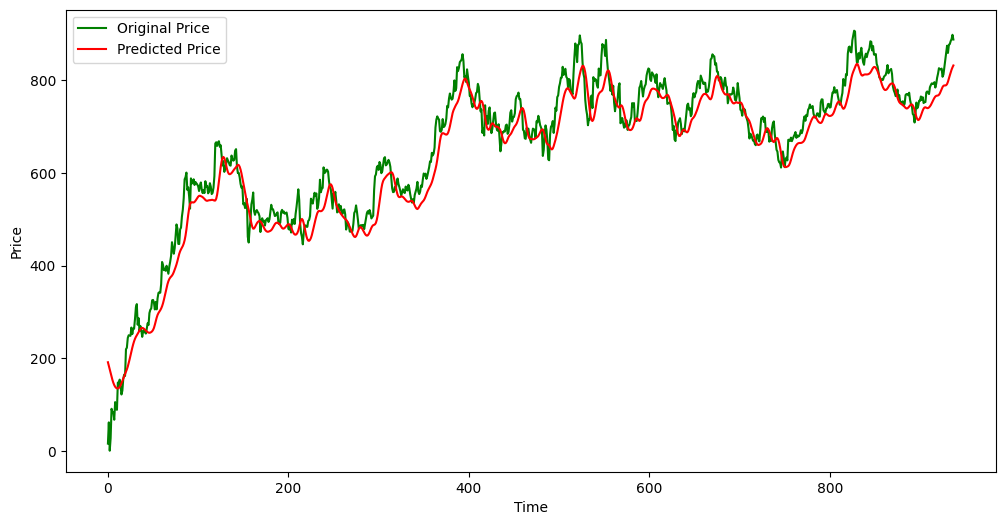

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'g', label="OG Price")
plt.plot(y_pred, 'r', label="PD Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()